# Project: NICS Data - A Look at Handgun and Total Checks

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project I have selected the data from the FBI's NICS database and the US Census for analysis of checks made for firearms purchases.  In particular we will look at handgun checks and total checks.  I have viewed these two variables mostly over a ten year period so that there are enough years to show any trends.  The ten years from 2007 to 2016 shows data that is still current and relevant today in 2018.  We will look at the total checks on a per capita basis in 2010 and 2016 since those are the two years for which census data is available.

In [1]:
"""Below are the modules that we will import for this project and the files that we will be reading to retrieve 
pertinent data."""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Note that the file name for the census data has been slightly modified.
df_fbi = pd.read_excel('NICS_data.xlsx')
df_cen = pd.read_csv('US_census_data.csv')


<a id='wrangling'></a>
## Data Wrangling


### General Properties - NICS Data

In [2]:
df_fbi.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
df_fbi.shape

(12485, 27)

In [4]:
df_fbi.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [5]:
df_fbi.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [6]:
# Are there any null values in the data?
df_fbi.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [7]:
# How many states are included in this data?
df_fbi['state'].nunique()

55

In [8]:
# Why are there more than 50 states?
# Ans: We can see that the data includes Guam, Puerto Rico, Wash. DC,  the Virgin Islands and the Mariana Islands.
states_fbi = df_fbi['state'].unique()
print(states_fbi)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Mariana Islands' 'Maryland' 'Massachusetts'
 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska'
 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']


In [9]:
# Let's make sure that the dates are in a workable format and also see the earliest and most recent months.
df_fbi['month'].min(), df_fbi['month'].max()

('1998-11', '2017-09')

In [10]:
df_fbi.shape

(12485, 27)

In [11]:
df_fbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

### Cleaning - NICS Data
Now that we have an idea of what is in the data let's clean a few items up such as the states that are included and the null values.

In [12]:
# Let's check what values we need to remove from the 'state' field.

fifty_states = df_fbi['state'].unique().tolist()
states_to_remove = ['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']

In [13]:
fifty_states = [i for i in fifty_states if i not in states_to_remove]

In [14]:
df_fbi = df_fbi[df_fbi['state'].isin(fifty_states)]

In [15]:
df_fbi['permit'].fillna(0, inplace=True)

# Let's check to make sure that there are no null values in the 'permit' column.

df_fbi['permit'].isnull().value_counts()

False    11350
Name: permit, dtype: int64

In [16]:
# Now let's include the year as a separate column so that we can view data on an annual basis.
year = df_fbi['month'].str[0:4]

In [17]:
# This will add a 'year' column on the right side of our data frame.
df_fbi = df_fbi.assign(year=year)

In [18]:
Alabama = df_fbi.state == 'Alabama'
Alaska = df_fbi.state == 'Alaska'
Washington = df_fbi.state == 'Washington'

### General Properties - Census Data
Next let's now do some work on reviewing, cleaning and organizing the census dataset.

In [19]:
df_cen.head(3)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


In [20]:
# If we transpose the data set then it will be easier to read and the state populations for 2010 
    # and 2016 will better line up with the NICS data that we have.

df_cen = df_cen.transpose()

In [21]:
df_cen.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# It will help if we rename the two most critical columns.  Then we can
    # create a dataframe that contains only those two columns.

df_cen.rename(columns={0: 'pop_est_2016', 1: 'pop_est_2010', 6: 'perc_under_18_2016', 7:
                       'perc_under_18_2010'}, inplace=True)

In [23]:
# Let's check to see if the values are correct and to see the data type.
alabama_pop_2016 = df_cen['pop_est_2016'].iloc[2]
print('value:', alabama_pop_2016, '\n', 'data type:', type(alabama_pop_2016))

value: 4,863,300 
 data type: <class 'str'>


In [24]:
df_cen.shape

(52, 85)

### Cleaning - Census Data

In [25]:
# There are a couple of rows that we will not be using.

df_cen.drop(['Fact', 'Fact Note'], axis=0, inplace=True)

In [26]:
df_cen['pop_est_2010'] = df_cen['pop_est_2010'].str.replace(',', '')
df_cen['pop_est_2016'] = df_cen['pop_est_2016'].str.replace(',', '')

In [27]:
df_cen['pop_est_2010'] = df_cen['pop_est_2010'].astype(int)
df_cen['pop_est_2016'] = df_cen['pop_est_2016'].astype(int)

In [28]:
df_cen['perc_under_18_2016'] = df_cen['perc_under_18_2016'].str.rstrip('%')
df_cen['perc_under_18_2010'] = df_cen['perc_under_18_2010'].str.rstrip('%')

In [29]:
df_cen['perc_under_18_2016'] = df_cen['perc_under_18_2016'].astype(float)
df_cen['perc_under_18_2010'] = df_cen['perc_under_18_2010'].astype(float)

In [30]:
"""Some of the population percentage values were in a percentage format while others were in a decimal format.  The
function below will make sure that they are all in a decimal format between 0.0 and 1.0"""

def reduction(a):
    if a > 1:
        return a/100
    else:
        return a

df_cen['perc_under_18_2016'] = df_cen['perc_under_18_2016'].apply(reduction)
df_cen['perc_under_18_2010'] = df_cen['perc_under_18_2010'].apply(reduction)

In [31]:
# Let's check for null values in the percentage columns.  There should not be any.
print(df_cen['perc_under_18_2016'].isnull().value_counts())
print(df_cen['perc_under_18_2010'].isnull().value_counts())

False    50
Name: perc_under_18_2016, dtype: int64
False    50
Name: perc_under_18_2010, dtype: int64


In [32]:
# Let's make sure that the data types for the state populations were updated properly.
df_cen.dtypes.iloc[0:10]

pop_est_2016            int64
pop_est_2010            int64
2                      object
3                      object
4                      object
5                      object
perc_under_18_2016    float64
perc_under_18_2010    float64
8                      object
9                      object
dtype: object

In [33]:
df_cen['adult_perc_2016'] = 1 - df_cen['perc_under_18_2016']
df_cen['adult_perc_2010'] = 1 - df_cen['perc_under_18_2010']

# We now need to multiply the population colums with the adult percentage columns to view the adult population.
df_cen['adult_pop_2016'] = df_cen['pop_est_2016'] * df_cen['adult_perc_2016']
df_cen['adult_pop_2010'] = df_cen['pop_est_2010'] * df_cen['adult_perc_2010']

In [34]:
df_cen.head()

,pop_est_2016,pop_est_2010,2,3,4,5,perc_under_18_2016,perc_under_18_2010,8,9,...,79,80,81,82,83,84,adult_perc_2016,adult_perc_2010,adult_pop_2016,adult_pop_2010
Alabama,4863300,4780131,1.70%,"4,779,736",6.00%,6.40%,0.226,0.237,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,0.774,0.763,3.764194e+06,3.647240e+06
Alaska,741894,710249,4.50%,"710,231",7.30%,7.60%,0.252,0.264,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,0.748,0.736,5.549367e+05,5.227433e+05
Arizona,6931071,6392301,8.40%,"6,392,017",6.30%,7.10%,0.235,0.255,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,0.765,0.745,5.302269e+06,4.762264e+06
Arkansas,2988248,2916025,2.50%,"2,915,918",6.40%,6.80%,0.236,0.244,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,0.764,0.756,2.283021e+06,2.204515e+06
California,39250017,37254522,5.40%,"37,253,956",6.30%,6.80%,0.232,0.250,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,0.768,0.750,3.014401e+07,2.794089e+07


In [35]:
"""Let's make sure that the states and their populations are appearing as they should.  We'll also set up an
index of the first six states on the list to make a graph next."""

state_pop_2010 = list(df_cen['pop_est_2010'].iloc[0:6])
print(state_pop_2010, '\n')

states_cen = df_cen.index
first_6_states = df_cen.index[0:6]
print(first_6_states, '\n')

max_pop = df_cen['pop_est_2010'].max()
print('largest state pop:', max_pop)

min_pop = df_cen['pop_est_2010'].min()
print('smallest state pop:', min_pop)

[4780131, 710249, 6392301, 2916025, 37254522, 5029324] 

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado'], dtype='object') 

largest state pop: 37254522
smallest state pop: 563767


Text(0, 0.5, 'Population in Tens of Millions')

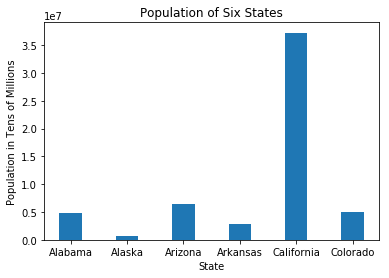

In [36]:
# Let's also setup a bar graph with a few state populations as a test.

x = [2, 4, 6, 8, 10, 12]

plt.bar(x, state_pop_2010, align='center', tick_label=first_6_states)
plt.title('Population of Six States')
plt.xlabel('State')
plt.ylabel('Population in Tens of Millions')


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which states showed the highest growth in handgun checks over a ten year period?  Can we suggest any reasons for these increases?

Before we dive in, let's take a look at a histogram of the monthly handgun check data for all states and also for the first two states on the list.  That will give us a general idea of the number of monthly checks.

Text(0, 0.5, 'Number of Months in Each Group')

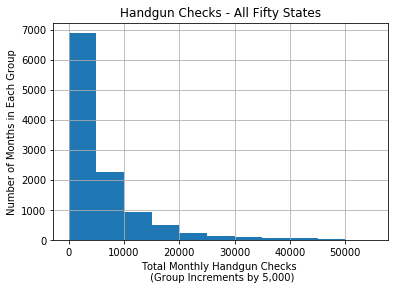

In [37]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000]
df_fbi.handgun.hist(bins=bins)
plt.title('Handgun Checks - All Fifty States')
plt.xlabel('Total Monthly Handgun Checks \n (Group Increments by 5,000)')
plt.ylabel('Number of Months in Each Group')

Text(0, 0.5, 'Number of Months in Each Group')

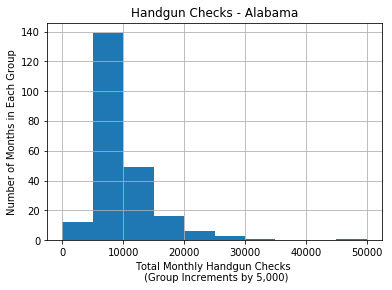

In [38]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
df_fbi.handgun[Alabama].hist(bins=bins)
plt.title('Handgun Checks - Alabama')
plt.xlabel('Total Monthly Handgun Checks \n (Group Increments by 5,000)')
plt.ylabel('Number of Months in Each Group')

Text(0, 0.5, 'Number of Months in Each Group')

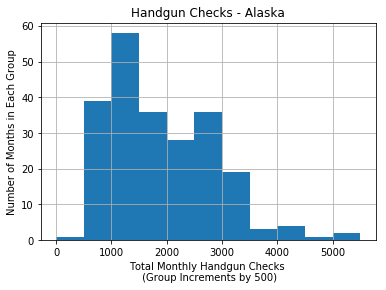

In [40]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]
df_fbi.handgun[Alaska].hist(bins=bins)
plt.title('Handgun Checks - Alaska')
plt.xlabel('Total Monthly Handgun Checks \n (Group Increments by 500)')
plt.ylabel('Number of Months in Each Group')

There were usually fewer than 10,000 checks per month in each state but a in some states there were months when the total far exceeded that number.
A look at the handgun checks for Alabama shows that most monhts had between 5,000 and 15,000 NICS approvals.
A look at the handgun checks for Alaska shows that most monhts had between 500 and 3,500 NICS approvals.

In [41]:
# Next let's look at the states with the largest increase in permits nominal terms for a given year or in total.

NICS_totals = df_fbi.groupby('state')['totals'].sum()
handgun_totals = df_fbi.groupby('state')['handgun'].sum()
handgun_percentage = ((handgun_totals / NICS_totals).round(3))*100

In [42]:
# What ten states have seen largest percentage increase in approved background checks for handgun purchases  
#    from the year 2007 to 2016?

ten_years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

handgun_per_yr = df_fbi.groupby(['year', 'state'])['handgun'].sum()
handgun_2007 = handgun_per_yr['2007']
handgun_2008 = handgun_per_yr['2008']
handgun_2009 = handgun_per_yr['2009']
handgun_2010 = handgun_per_yr['2010']
handgun_2011 = handgun_per_yr['2011']
handgun_2012 = handgun_per_yr['2012']
handgun_2013 = handgun_per_yr['2013']
handgun_2014 = handgun_per_yr['2014']
handgun_2015 = handgun_per_yr['2015']
handgun_2016 = handgun_per_yr['2016']
handgun_increase = handgun_2016 - handgun_2007

In [43]:
handgun_perc_incr = ((handgun_increase / handgun_2007)*100).round(2)

# It looks like we are going to have to strip out PA due to the way that they classify handguns and long guns.
#    Specifically, there appears to have been a major classification change in late 2013 or early 2014.

# In the data cleaning phase we stripped out non-US states since their relatively low number of permits makes 
#    it so that small change in absolute number of permits has a major impact on percentage changes.

# Next we need to work on a top 10 or 12 list.

In [44]:
top_11_handgun = handgun_perc_incr.nlargest(11)
top_10_handgun = top_11_handgun.drop('Pennsylvania')

In [45]:
print(top_10_handgun)

state
Nebraska          15509.09
Iowa               1107.79
Michigan            569.72
North Carolina      535.82
Illinois            447.44
Wisconsin           327.78
New Jersey          325.62
Connecticut         308.04
Delaware            305.94
Indiana             273.17
Name: handgun, dtype: float64


In [46]:
"""The following function will make a list for any given state to show the number of NICS handgun permits each year
over a ten-year period."""

def state_handguns(a):
    b = []
    i = 2007
    while i < 2017:
        i = str(i)
        b.append(handgun_per_yr[i][a])
        i = int(i)
        i += 1
    return(b)

NE = state_handguns('Nebraska')
IA = state_handguns('Iowa')
MI = state_handguns(top_10_handgun.index[2])
NC = state_handguns(top_10_handgun.index[3])
IL = state_handguns(top_10_handgun.index[4])
WI = state_handguns(top_10_handgun.index[5])
NJ = state_handguns(top_10_handgun.index[6])
CT = state_handguns(top_10_handgun.index[7])
DE = state_handguns(top_10_handgun.index[8])
IN = state_handguns(top_10_handgun.index[9])


Text(0, 0.5, 'Number of Handgun\nPermits Granted via NICS')

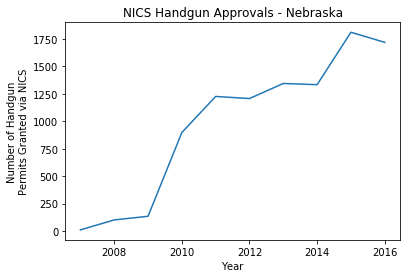

In [47]:
"""The information above looks really interesting.  Let's graph some of these states to see when the 
increases occurred.  In cases where the scaling is similar, states will be graphed togeher rather than separately."""

plt.plot(ten_years, NE, label='Nebraska')
plt.title('NICS Handgun Approvals - Nebraska')
plt.xlabel('Year')
plt.ylabel('Number of Handgun\n' 'Permits Granted via NICS')

Text(0, 0.5, 'Number of Handgun\nPermits Granted via NICS')

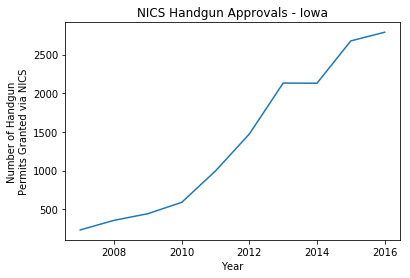

In [48]:
plt.plot(ten_years, IA, label='Iowa')
plt.title('NICS Handgun Approvals - Iowa')
plt.xlabel('Year')
plt.ylabel('Number of Handgun\n' 'Permits Granted via NICS')

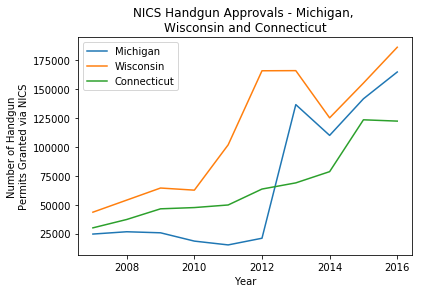

In [49]:
plt.plot(ten_years, MI, label='Michigan')
plt.plot(ten_years, WI, label='Wisconsin')
plt.plot(ten_years, CT, label='Connecticut')
plt.title('NICS Handgun Approvals - Michigan, \n' 'Wisconsin and Connecticut')
plt.xlabel('Year')
plt.ylabel('Number of Handgun\n' 'Permits Granted via NICS')
plt.legend()

Text(0, 0.5, 'Number of Handgun\nPermits Granted via NICS')

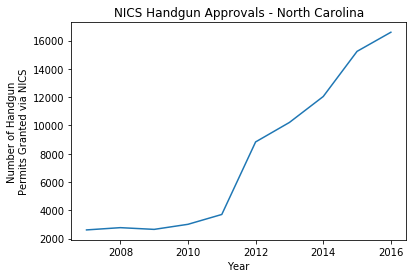

In [50]:
plt.plot(ten_years, NC)
plt.title('NICS Handgun Approvals - North Carolina')
plt.xlabel('Year')
plt.ylabel('Number of Handgun\n' 'Permits Granted via NICS')

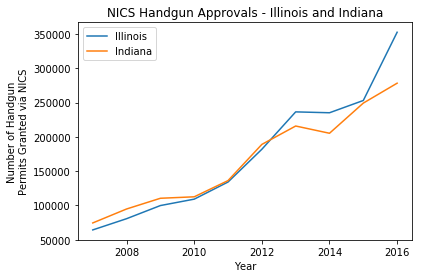

In [51]:
plt.plot(ten_years, IL, label='Illinois')
plt.plot(ten_years, IN, label='Indiana')
plt.title('NICS Handgun Approvals - Illinois and Indiana')
plt.xlabel('Year')
plt.ylabel('Number of Handgun\n' 'Permits Granted via NICS')
plt.legend()

Text(0, 0.5, 'Number of Handgun\nPermits Granted via NICS')

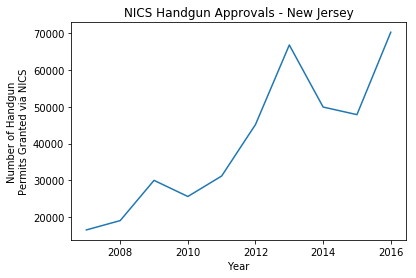

In [52]:
plt.plot(ten_years, NJ)
plt.title('NICS Handgun Approvals - New Jersey')
plt.xlabel('Year')
plt.ylabel('Number of Handgun\n' 'Permits Granted via NICS')

Text(0, 0.5, 'Number of Handgun\nPermits Granted via NICS')

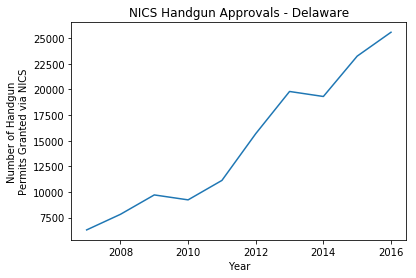

In [53]:
plt.plot(ten_years, DE)
plt.title('NICS Handgun Approvals - Delaware')
plt.xlabel('Year')
plt.ylabel('Number of Handgun\n' 'Permits Granted via NICS')

**Observation:**  In the graphs above we can see that in certain cases, such as Michigan and Wisconsin, that the jump in NICS handgun checks in the 2010 and 2012 periods, respectively, was more likely due to changes in firearm classification than in actual increases in handgun checks.  In other states where there is a more steady increase over the ten-year period it is more plausible that there was indeed a major increase in phone calls to the NICS to approve handguns purchases.

### Research Question 2: What trends can we observe in terms of total NICS checks and per capita approvals?  Are there particular states that show large increases in checks on a per capita basis?

Now that we have analyzed handgun permits we can see that those figures were impacted by how permits were classified.  It would be helpful to view per capita figures for all NICS checks, the 'totals' column, in order to get a better sense of what the grow trend was.  We will look at 2010 and 2016 since those are the two years for which we have population data.  We will look at the totals on an absolute basis and also on a per capita basis.

In [54]:
adult_pop_2016 = df_cen['adult_pop_2016']
adult_pop_2010 = df_cen['adult_pop_2010']
populations = pd.concat([adult_pop_2016, adult_pop_2010], axis=1)

In [55]:
print(populations.shape)
print(populations.dtypes)

(50, 2)
adult_pop_2016    float64
adult_pop_2010    float64
dtype: object


In [56]:
df_fbi['totals'].shape

(11350,)

In [57]:
total_2007 = df_fbi['year'] == '2007'
total_2008 = df_fbi['year'] == '2008'
total_2009 = df_fbi['year'] == '2009'
total_2010 = df_fbi['year'] == '2010'
total_2011 = df_fbi['year'] == '2011'
total_2012 = df_fbi['year'] == '2012'
total_2013 = df_fbi['year'] == '2013'
total_2014 = df_fbi['year'] == '2014'
total_2015 = df_fbi['year'] == '2015'
total_2016 = df_fbi['year'] == '2016'

In [58]:
totals_2007_to_2016 = [df_fbi.totals[total_2007].sum(), df_fbi.totals[total_2008].sum(), \
                        df_fbi.totals[total_2009].sum(), df_fbi.totals[total_2010].sum(), \
                        df_fbi.totals[total_2011].sum(), df_fbi.totals[total_2012].sum(), \
                        df_fbi.totals[total_2013].sum(), df_fbi.totals[total_2014].sum(), \
                        df_fbi.totals[total_2015].sum(), df_fbi.totals[total_2016].sum()]

In [59]:
print(totals_2007_to_2016)

[11151998, 12684240, 13974323, 14309926, 16323039, 19446504, 20946761, 20840268, 23006228, 27405549]


Text(0, 0.5, 'Total NICS Calls, \n in Tens of Millions')

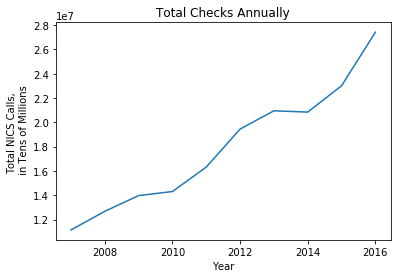

In [60]:
plt.plot(ten_years, totals_2007_to_2016)
plt.title('Total Checks Annually')
plt.xlabel('Year')
plt.ylabel('Total NICS Calls, \n in Tens of Millions')

In [61]:
annual_check_incr = ((df_fbi.totals[total_2016].sum() / df_fbi.totals[total_2007].sum())**(1/9) - 1)*100

In [62]:
print('The line on the chart looks quite steep but it is important to remember that this represents an annualized \
increase of approximately', round(annual_check_incr, 1), '%.')

The line on the chart looks quite steep but it is important to remember that this represents an annualized increase of approximately 10.5 %.


Next let's look at permits per capita in 4 states that have a high population and substantially different regulations pertaining to gun laws.  We will look at CA, FL, NY and TX.  I would like to know if the trends are similar or substantially different.  We will have to graph them on separate graphs since the scales are different.

In [63]:
"""This fuction will allow us to show the total number of checks made in a given state over a ten year period."""

check_per_yr = df_fbi.groupby(['year', 'state'])['totals'].sum()

def state_totals(a):
    c = []
    i = 2007
    while i < 2017:
        i = str(i)
        c.append(check_per_yr[i][a])
        i = int(i)
        i += 1
    return c

In [64]:
CA_totals = state_totals('California')
FL_totals = state_totals('Florida')
NY_totals = state_totals('New York')
TX_totals = state_totals('Texas')

In [65]:
# I would like to make sure that the lists appear as they should for graphing.
print(CA_totals, '\n', FL_totals, '\n', NY_totals, '\n', TX_totals)

[855943, 780398, 788164, 816399, 905701, 1132603, 1368295, 1474616, 1761079, 2377167] 
 [426180, 503672, 556540, 559347, 643229, 834319, 1073859, 1034546, 1147082, 1435340] 
 [212174, 221920, 241165, 241495, 271837, 338619, 353064, 365427, 346048, 404772] 
 [783596, 944568, 1014015, 968071, 1155387, 1436132, 1633278, 1465992, 1574266, 1721726]


Text(0, 0.5, 'Number of Checks via NICS')

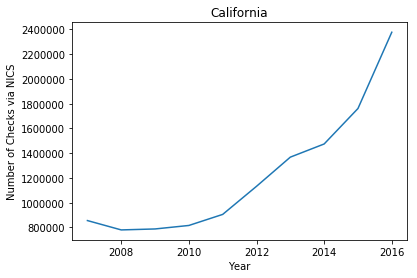

In [66]:
plt.plot(ten_years, CA_totals)
plt.title('California')
plt.xlabel('Year')
plt.ylabel('Number of Checks via NICS')

Text(0, 0.5, 'Number of Checks via NICS')

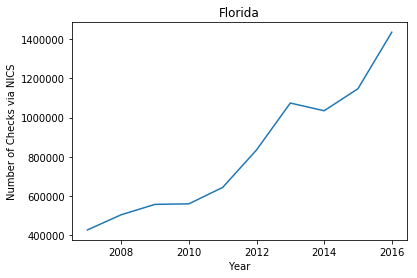

In [67]:
plt.plot(ten_years, FL_totals)
plt.title('Florida')
plt.xlabel('Year')
plt.ylabel('Number of Checks via NICS')

Text(0, 0.5, 'Number of Checks via NICS')

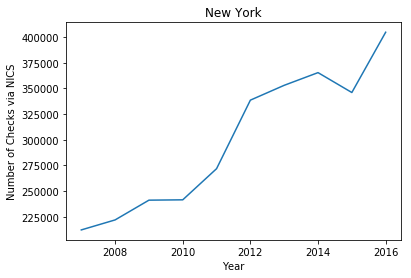

In [68]:
plt.plot(ten_years, NY_totals)
plt.title('New York')
plt.xlabel('Year')
plt.ylabel('Number of Checks via NICS')

Text(0, 0.5, 'Number of Checks via NICS')

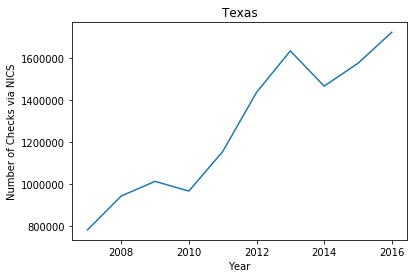

In [69]:
plt.plot(ten_years, TX_totals)
plt.title('Texas')
plt.xlabel('Year')
plt.ylabel('Number of Checks via NICS')

California shows a rather marked increase beginning around 2011 but generally speaking the four states shown above show increases that are similar to the national trend for total checks via NICS.

As a final step we will take a look at the per capita figures.  This will give us an idea of which states show the hightest number of total checks per capita and we can use the 2010 and 2016 census data to get an idea of the changes between those two years.

In [70]:
total_checks_2010 = check_per_yr['2010']
total_checks_2016 = check_per_yr['2016']

In [71]:
checks_2010_2016 = pd.concat([populations, total_checks_2016], axis=1)

In [72]:
checks_2010_2016.shape

(50, 3)

In [73]:
checks_2010_2016.rename(columns={'totals': '2016_total_checks'}, inplace=True)

In [74]:
checks_2010_2016 = pd.concat([checks_2010_2016, total_checks_2010], axis=1)

In [75]:
checks_2010_2016.rename(columns={'totals': '2010_total_checks'}, inplace=True)

In [76]:
checks_2010_2016['per_capita_2016'] = checks_2010_2016['2016_total_checks'] / checks_2010_2016['adult_pop_2016']
checks_2010_2016['per_capita_2010'] = checks_2010_2016['2010_total_checks'] / checks_2010_2016['adult_pop_2010']
checks_2010_2016['per_capita_change'] = checks_2010_2016['per_capita_2016'] - checks_2010_2016['per_capita_2010']

In [77]:
checks_2010_2016.head()

,adult_pop_2016,adult_pop_2010,2016_total_checks,2010_total_checks,per_capita_2016,per_capita_2010,per_capita_change
state,,,,,,,
Alabama,3.764194e+06,3.647240e+06,616947,308607,0.163899,0.084614,0.079285
Alaska,5.549367e+05,5.227433e+05,87647,65909,0.157941,0.126083,0.031858
Arizona,5.302269e+06,4.762264e+06,416279,206050,0.078510,0.043267,0.035242
Arkansas,2.283021e+06,2.204515e+06,266014,191448,0.116518,0.086844,0.029675
California,3.014401e+07,2.794089e+07,2377167,816399,0.078860,0.029219,0.049642


In [78]:
# Let's graph the per capita increases for the 4 states that had the fewest checks per capita  
#    and for the 4 states that had the most checks per capita in 2010.  

print(checks_2010_2016['per_capita_2010'].nlargest(4))
print(checks_2010_2016['per_capita_2010'].nsmallest(4))

state
Kentucky    0.719575
Utah        0.292159
Montana     0.132011
Alaska      0.126083
Name: per_capita_2010, dtype: float64
state
New Jersey      0.007512
Hawaii          0.009965
New York        0.016039
Rhode Island    0.017902
Name: per_capita_2010, dtype: float64


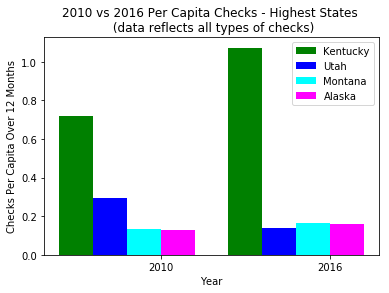

In [79]:
d = 2
ind = np.arange(d)
ticks = ['2010', '2016']
width = .2
large1 = [checks_2010_2016.per_capita_2010['Kentucky'], checks_2010_2016.per_capita_2016['Kentucky']]
large2 = [checks_2010_2016.per_capita_2010['Utah'], checks_2010_2016.per_capita_2016['Utah']]
large3 = [checks_2010_2016.per_capita_2010['Montana'], checks_2010_2016.per_capita_2016['Montana']]
large4 = [checks_2010_2016.per_capita_2010['Alaska'], checks_2010_2016.per_capita_2016['Alaska']]

plt.bar(ind, large1, width=width, align='edge', color='green', tick_label=ticks, label='Kentucky')
plt.bar(ind + width, large2, width=width, align='edge', color='blue', tick_label=ticks, label='Utah')
plt.bar(ind + width*2, large3, width=width, align='edge', color='cyan', tick_label=ticks, label='Montana')
plt.bar(ind + width*3, large4, width=width, align='edge', color='magenta', tick_label=ticks, label='Alaska')

plt.title('2010 vs 2016 Per Capita Checks - Highest States \n (data reflects all types of checks)' )
plt.xlabel('Year')
plt.ylabel('Checks Per Capita Over 12 Months')
plt.legend()

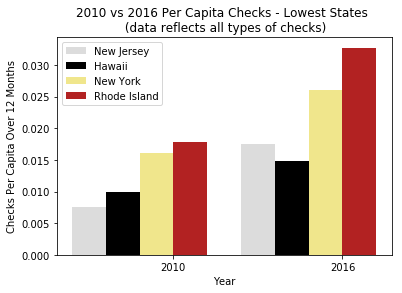

In [80]:
small1 = [checks_2010_2016.per_capita_2010['New Jersey'], checks_2010_2016.per_capita_2016['New Jersey']]
small2 = [checks_2010_2016.per_capita_2010['Hawaii'], checks_2010_2016.per_capita_2016['Hawaii']]
small3 = [checks_2010_2016.per_capita_2010['New York'], checks_2010_2016.per_capita_2016['New York']]
small4 = [checks_2010_2016.per_capita_2010['Rhode Island'], checks_2010_2016.per_capita_2016['Rhode Island']]

plt.bar(ind, small1, width=width, align='edge', color='gainsboro', tick_label=ticks, label='New Jersey')
plt.bar(ind + width, small2, width=width, align='edge', color='black', tick_label=ticks, label='Hawaii')
plt.bar(ind + width*2, small3, width=width, align='edge', color='khaki', tick_label=ticks, label='New York')
plt.bar(ind + width*3, small4, width=width, align='edge', color='firebrick', tick_label=ticks, label='Rhode Island')

plt.title('2010 vs 2016 Per Capita Checks - Lowest States \n (data reflects all types of checks)' )
plt.xlabel('Year')
plt.ylabel('Checks Per Capita Over 12 Months')
plt.legend()

I referred to the bar chart examples in the following website for an example of how to set up bar graphs with multiple columns in matplotlib.
**http://benalexkeen.com/bar-charts-in-matplotlib/**

In states that had a high number of NICS checks per capita in 2010, not all of them show growth.  Some show decreases and others are relatively flat.

All of the states with low per capita figures in 2010 show increases in checks from 2010 to 2016.

<a id='conclusions'></a>
## Conclusions

**Comments on Limitations:**  One major limitation to per capita section of the study is the availability of population data.  Ideally we would be able to view population data each year for several years, and preferably for the same ten year period that we used to view handgun checks and total NICS checks.

Another limitation is way in which the categories in the data such as handguns and long-guns are are used by those reporting the data to the NICS.  As discussed above, there appear to have been changes in certain states as to how certain types of firearms are classified.  This does not impact the totals but it makes it much more difficult to analyze the individual types of checks.

In this study I often relied on total checks found in the 'totals' column.  This 'totals' column aggregates different types of checks that are quite different.  For example, a check for a permits is quite different from a firearm purchase.  Ideally we would separate out all types of checks but some of them have very limited data and there may be some inconsistencies with how checks are classified from state to state.

One final limitation pertains to the different regulations that exists in each state.  A more complete study might categorize states with similar regulations and make comparisons between those categories.  This would require more than NICS data.


**General Conclusion:** In spite of the limitations described above, there has clearly been substantial growth in the number of background checks conducted through the NICS.  This growth has occurred across nearly all states and has occurred on both an absolute basis and on a per capita basis.  The growth in specific types of checks, such as checks for handguns, is harder to attribute to growth since there appears to have been changes in the way that checks have been classified, i.e. handgun vs long-gun.